## Multiple Linear Regression on Boston Housing Dataset

In this notebook, I perform Multiple Linear Regression to predict housing prices using the Boston Housing dataset. The analysis includes exploratory data analysis (EDA), correlation analysis, model training, and evaluation. The objective is to understand how various features—such as the number of rooms, property tax rate, and distance to employment centers—influence the median value of owner-occupied homes. This project demonstrates my understanding of regression modeling and its application in real-world housing data.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from sklearn import metrics
#from sklearn.metrics import root_mean_squared_error For further versions

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline

In [6]:
df=pd.read_excel("C:/Users/knowl/OneDrive/Desktop/Bostonhousing.xlsx")

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
df.shape

(506, 14)

In [12]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [14]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [16]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [29]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


My dataset does not have missing values.

## EDA

<Figure size 1200x800 with 0 Axes>

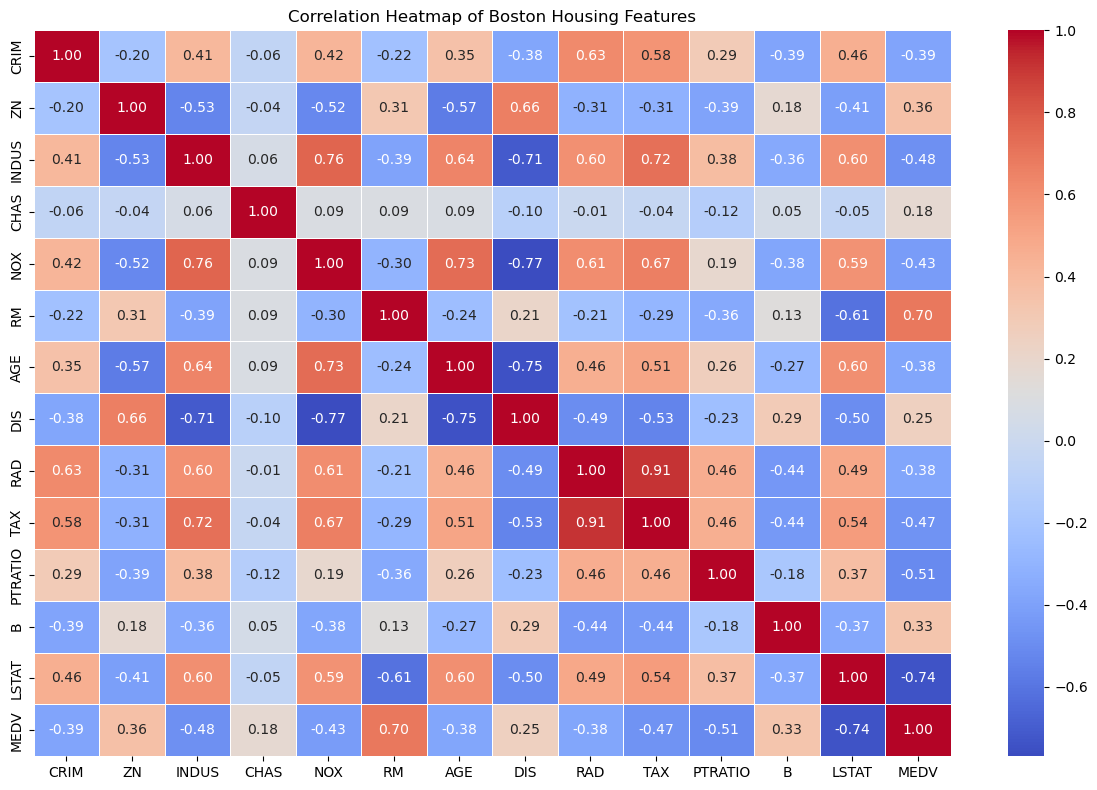

In [22]:
# Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Boston Housing Features")
plt.tight_layout()
plt.show()

The target variable MEDV (median home value) shows:

Strong positive correlation with:

RM (average number of rooms per dwelling) → +0.70

Strong negative correlation with:

LSTAT (% lower status of population) → –0.74

PTRATIO (pupil-teacher ratio) → –0.51

INDUS (proportion of non-retail business acres) → –0.48

Other notable feature relationships:

TAX and RAD have an extremely high correlation (+0.91), indicating potential multicollinearity.

NOX is moderately correlated with both TAX and INDUS (both over +0.6), which may suggest urban pollution and industrial zones.

Weak correlations with MEDV:

AGE, B, CHAS show low correlation and may contribute less predictive power on their own.

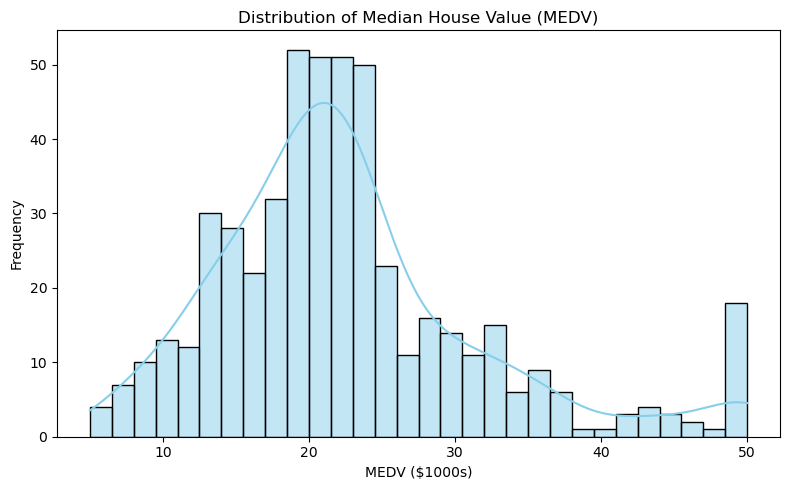

In [24]:
# Distribution of Target Variable (MEDV)
plt.figure(figsize=(8, 5))
sns.histplot(df['MEDV'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Median House Value (MEDV)")
plt.xlabel("MEDV ($1000s)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

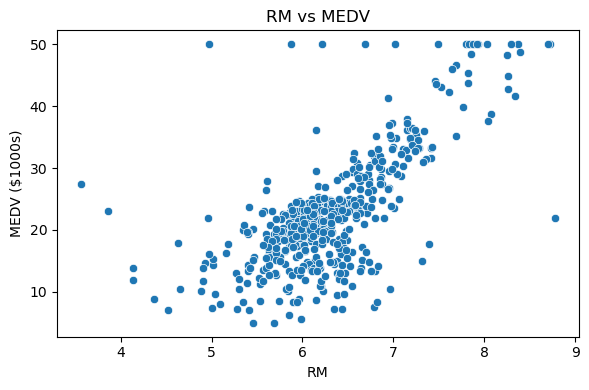

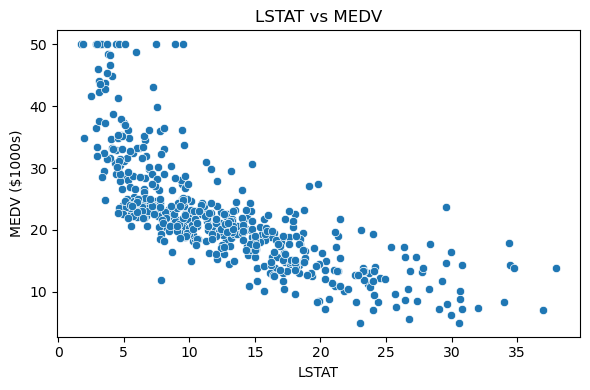

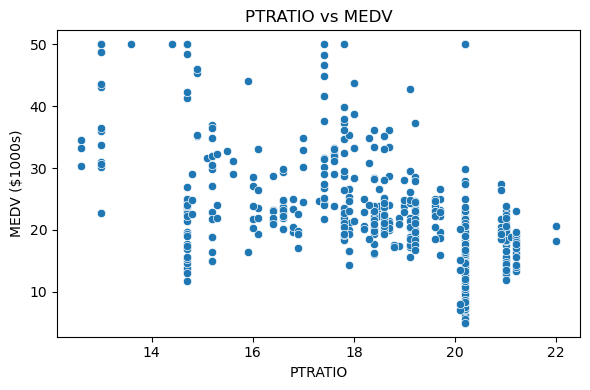

In [26]:
# Scatter Plots of Key Features vs Target
features = ['RM', 'LSTAT', 'PTRATIO']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['MEDV'])
    plt.title(f"{feature} vs MEDV")
    plt.xlabel(feature)
    plt.ylabel("MEDV ($1000s)")
    plt.tight_layout()
    plt.show()

In [31]:
#define simple regression variables
import statsmodels.api as sm
y=df['MEDV']
X=df[['CRIM','AGE','TAX']]
model=sm.OLS(y,sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     59.53
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           6.16e-33
Time:                        20:27:19   Log-Likelihood:                -1763.2
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     502   BIC:                             3551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4709      1.149     29.123      0.0

In [34]:
predictions = model.predict(sm.add_constant(X))

In [37]:
#Model Evaluation
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y, predictions)
#rmse=root_mean_squared_error(y, predictions)
rmse=mean_squared_error(y, predictions, squared=False)
print("Mean Squared Error:", mse.round(2))
print("Root Mean Squared Error:", rmse.round(2))

Mean Squared Error: 62.27
Root Mean Squared Error: 7.89


C:\Users\knowl\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
#(Optional) Another Way
# train linear regression model
reg = LinearRegression()
reg.fit(X,y)
#reg.coef_
y_pred=reg.predict(X)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y, y_pred)
rmse=mean_squared_error(y, y_pred, squared=False)
print("Mean Squared Error:", mse.round(2))
print("Root Mean Squared Error:", rmse.round(2))

Mean Squared Error: 62.27
Root Mean Squared Error: 7.89


C:\Users\knowl\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R-squared = 0.262: The model explains 26.2% of the variability in housing prices. This suggests a weak fit, indicating that other important predictors are likely missing.

- All predictors are statistically significant (p < 0.05):

- CRIM: Higher crime rates are associated with lower home values.

- AGE: Older homes tend to have slightly lower values.

- TAX: Higher property tax is associated with reduced housing prices.

- Intercept (const) = 33.47: When all predictors are 0, the estimated median home value is ~$33,470.

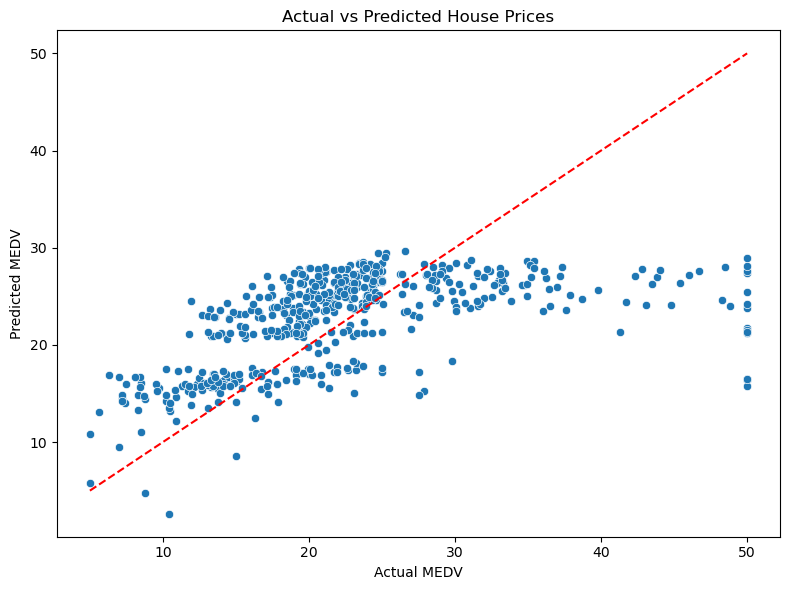

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=predictions)  # or y_pred
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # reference line
plt.tight_layout()
plt.show()

Using Polynomial Regression to check the model performance. 

In [52]:
# Define X and y
X = df[['CRIM', 'AGE', 'TAX']]  
y = df['MEDV']

In [54]:
# 📐 Create and train Polynomial Regression model (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [58]:
from sklearn.metrics import mean_squared_error, r2_score  

# Predict
y_pred = poly_model.predict(X)

# Evaluation
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

# Print results
print("R² Score:", round(r2, 2))
print("Mean Squared Error:", round(mse, 2))
print("Root Mean Squared Error:", round(rmse, 2))


R² Score: 0.28
Mean Squared Error: 60.67
Root Mean Squared Error: 7.79


C:\Users\knowl\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- R² Score: 0.28
Indicates that the model explains 28% of the variance in the target variable (MEDV). This is a modest improvement over the basic linear regression (which had ~0.26), but still suggests a relatively weak model fit.

- Mean Squared Error (MSE): 60.67
This is the average squared difference between the predicted and actual house prices. A lower MSE is better, but here it still suggests noticeable prediction error.

- Root Mean Squared Error (RMSE): 7.79
On average, the model’s predicted house price deviates by about $7,790 from the actual value.

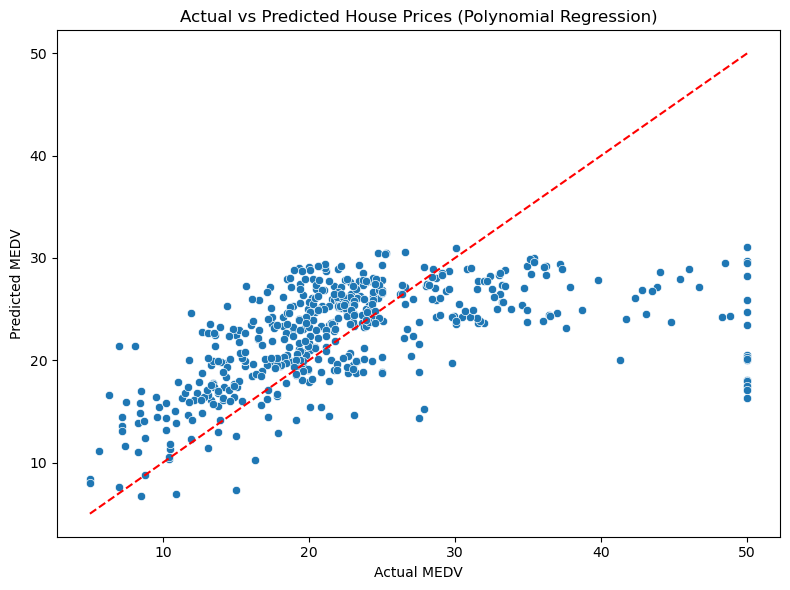

In [60]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices (Polynomial Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.tight_layout()
plt.show()